In [1]:
import os
import sys
import glob
import uproot
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats as st
import scipy

import peakutils

from datetime import datetime

import math
from scipy          import stats
from scipy.optimize import curve_fit

In [2]:
### Import functions from peak_functions

repository_path = os.path.abspath('../..')
sys.path.append(repository_path)

import blr_functions  as blr
import peak_functions as pf
import fit_functions  as fitf

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
plt.rcParams["figure.figsize"] = 8, 5
plt.rcParams["font.size"]      = 14

In [5]:
filename = '/Users/romoluque_c/LEGEND/BACON/new_setup/datatest/run-09_09_2024-file.root'
infile   = uproot.open(filename)
RawTree  = infile['RawTree']

In [6]:
fav_col = '#418094'

## SiPMs

### Visual check to one/few events

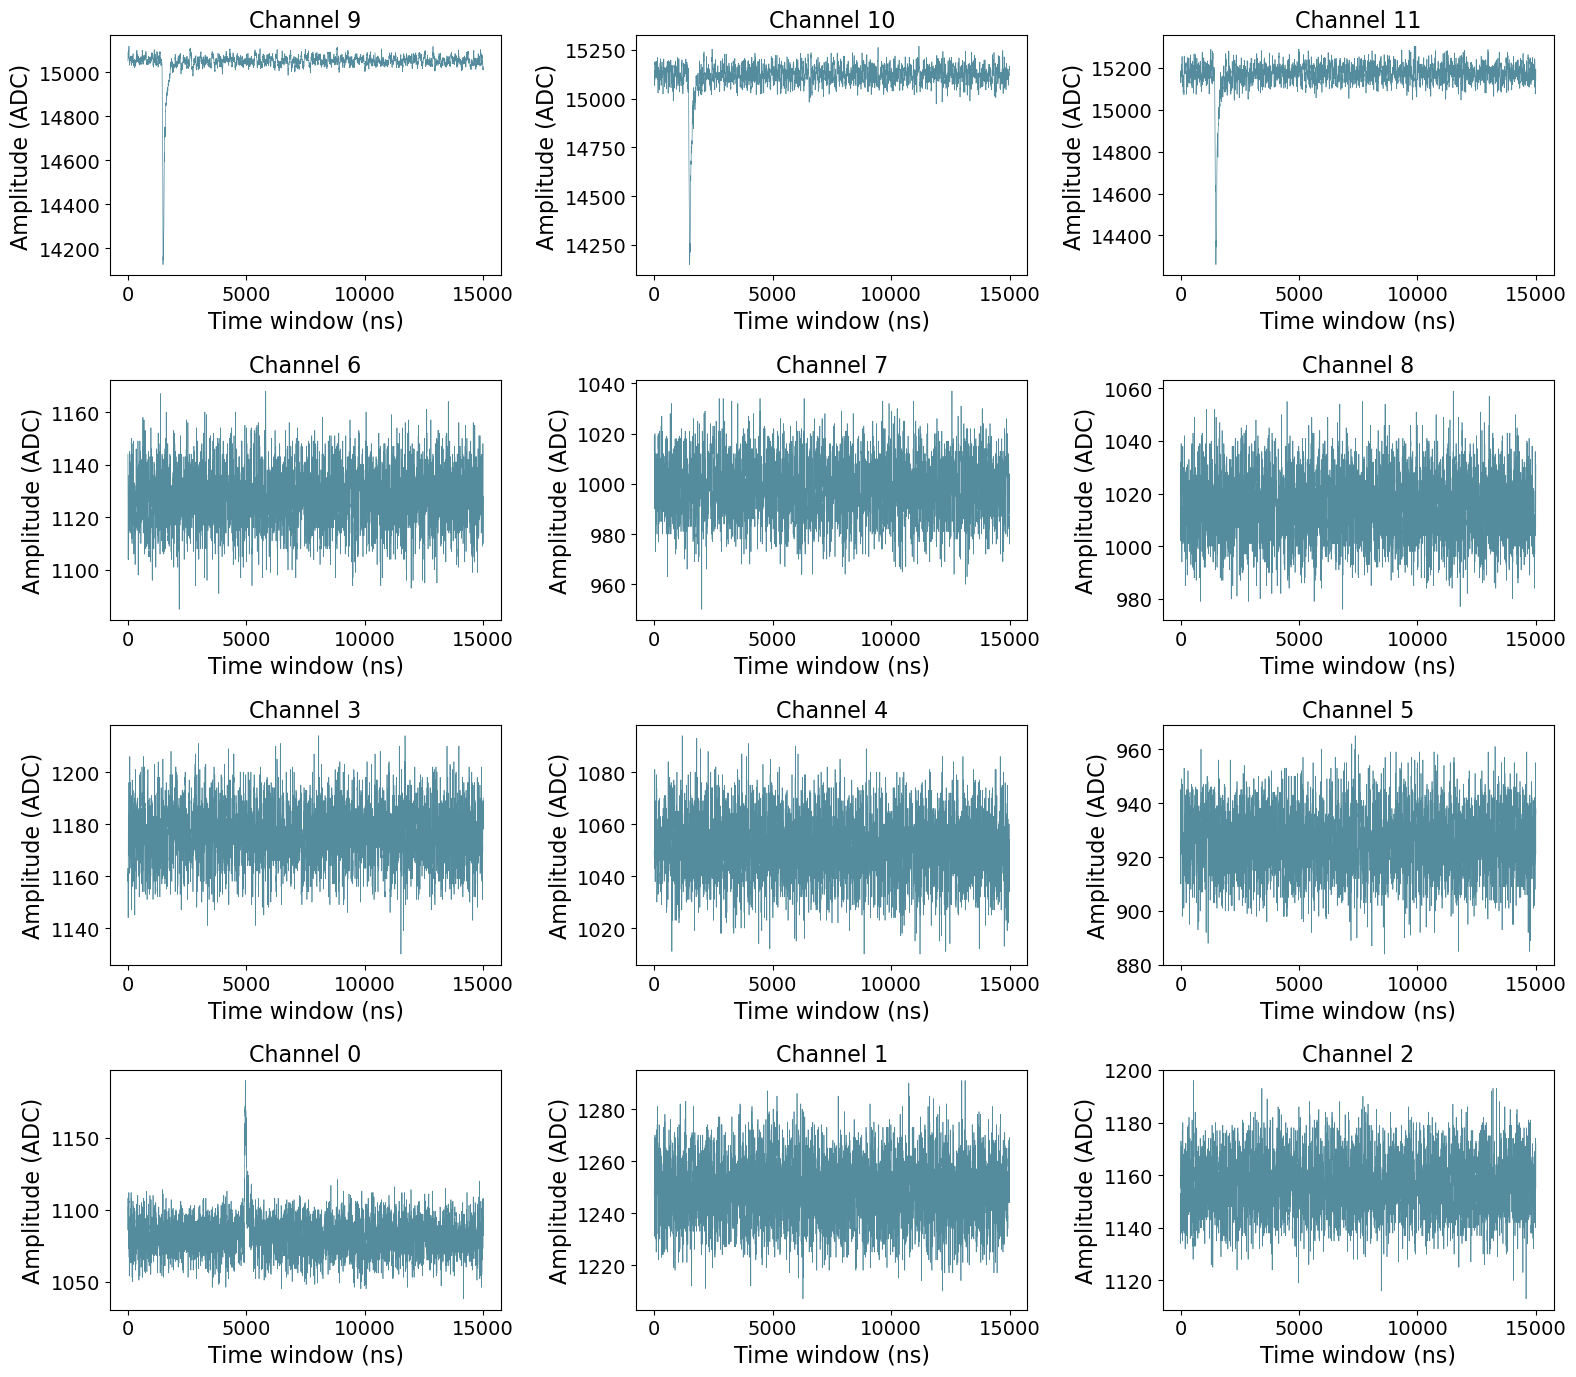

In [18]:
choose_evt = 107
fig, axs   = plt.subplots(4, 3, figsize=(16, 14))
for row, ich in enumerate(reversed(np.arange(0, 12, 3))):
    for col in range(3):
        ch = ich + col
        wf = np.array(RawTree[f'chan{ch}/rdigi'].array())[choose_evt]
        axs[row][col].plot(2*np.arange(len(wf)), wf, linewidth=0.5, color=fav_col, alpha=0.9)
        axs[row][col].set_xlabel('Time window (ns)', fontsize=16)
        axs[row][col].set_ylabel('Amplitude (ADC)',  fontsize=16)
        axs[row][col].set_title(f"Channel {ch}",     fontsize=16)
plt.tight_layout()
plt.show()

21000
21001
21002
21003
21004
21005
21006
21007
21008
21009
21010
21011
21012


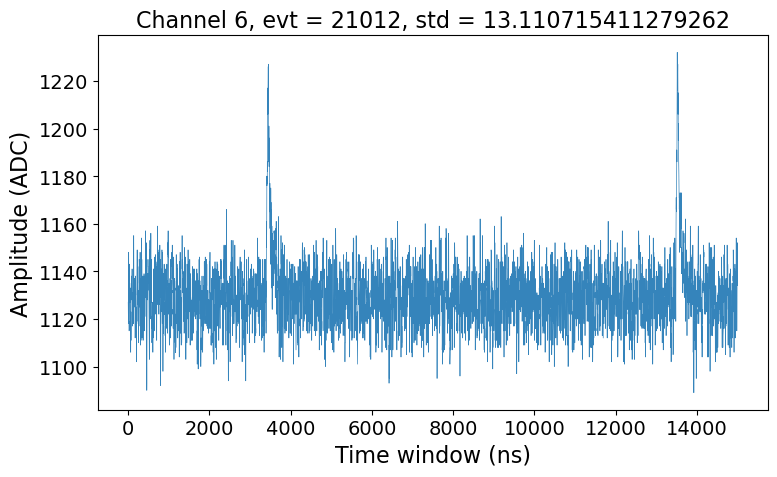

21013
21014
21015
21016
21017
21018
21019
21020
21021
21022
21023
21024
21025
21026
21027
21028
21029
21030
21031
21032
21033
21034
21035
21036
21037
21038
21039
21040
21041
21042
21043
21044
21045
21046
21047
21048
21049
21050
21051
21052
21053
21054
21055
21056
21057
21058
21059
21060
21061
21062
21063
21064
21065
21066
21067
21068
21069
21070
21071
21072
21073
21074
21075
21076
21077
21078
21079
21080
21081
21082
21083
21084
21085
21086
21087
21088
21089
21090
21091
21092
21093
21094
21095
21096
21097
21098
21099


In [22]:
ch = 6
for evt in np.arange(21000, 21100): #range(100):
    print(evt)
    wf = np.array(RawTree[f'chan{ch}/rdigi'].array())[evt]
    if np.std(wf)>12:
        plt.plot(2*np.arange(len(wf)), wf, linewidth=0.5, alpha=0.9)
        plt.xlabel('Time window (ns)', fontsize=16)
        plt.ylabel('Amplitude (ADC)',  fontsize=16)
        plt.title(f"Channel {ch}, evt = {evt}, std = {np.std(wf)}",     fontsize=16)
        plt.tight_layout()
        plt.show()

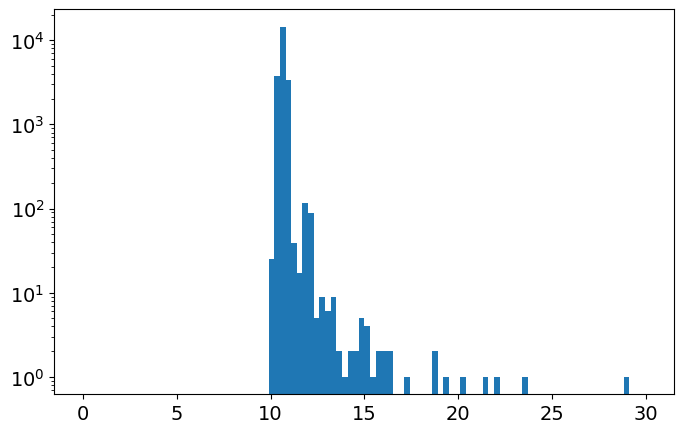

In [33]:
plt.hist(np.std(np.array(RawTree[f'chan{ch}/rdigi'].array()), axis=1), bins=100, range=(0, 30), log=True);

In [61]:
ten_wfs_all_chs = {}
ten_files = np.sort(glob.glob('/Users/romoluque_c/LEGEND/BACON/new_setup/datatest/run-09_01_2024-file*.root'))
for ch in range(9):
    ten_wfs_ch = np.array([])
    for filename in ten_files:
        RawTree  = uproot.open(filename)['RawTree']
        wfs = np.array(RawTree[f'chan{ch}/rdigi'].array())
        print(ch, len(wfs))
        ten_wfs_ch = np.append(ten_wfs_ch, wfs)
    ten_wfs_all_chs[ch] = ten_wfs_ch.reshape(230296, 7500)

0 23096
0 23095
0 23095
0 23095
0 23095
0 23095
0 23095
0 23095
0 23095
0 22440
1 23096
1 23095
1 23095
1 23095
1 23095
1 23095
1 23095
1 23095
1 23095
1 22440
2 23096
2 23095
2 23095
2 23095
2 23095
2 23095
2 23095
2 23095
2 23095
2 22440
3 23096
3 23095
3 23095
3 23095
3 23095
3 23095
3 23095
3 23095
3 23095
3 22440
4 23096
4 23095
4 23095
4 23095
4 23095
4 23095
4 23095
4 23095
4 23095
4 22440
5 23096
5 23095
5 23095
5 23095
5 23095
5 23095
5 23095
5 23095
5 23095
5 22440
6 23096
6 23095
6 23095
6 23095
6 23095
6 23095
6 23095
6 23095
6 23095
6 22440
7 23096
7 23095
7 23095
7 23095
7 23095
7 23095
7 23095
7 23095
7 23095
7 22440
8 23096
8 23095
8 23095
8 23095
8 23095
8 23095
8 23095
8 23095
8 23095
8 22440


In [47]:
#all_stds = np.std(ten_wfs_ch0, axis=1)

In [70]:
len(ten_wfs_all_chs[0])

230296

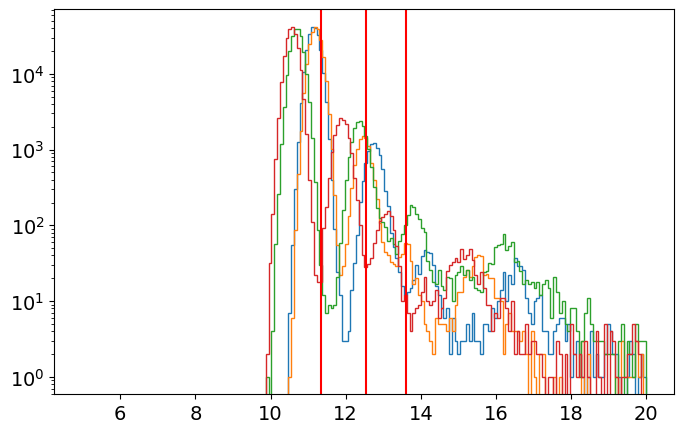

In [67]:
plt.hist(np.std(ten_wfs_all_chs[0], axis=1), bins=200, range=(5, 20), log=True, histtype='step', label=f'Ch 0')
plt.hist(np.std(ten_wfs_all_chs[1], axis=1), bins=200, range=(5, 20), log=True, histtype='step', label=f'Ch 1')
plt.hist(np.std(ten_wfs_all_chs[2], axis=1), bins=200, range=(5, 20), log=True, histtype='step', label=f'Ch 2')
plt.hist(np.std(ten_wfs_all_chs[3], axis=1), bins=200, range=(5, 20), log=True, histtype='step', label=f'Ch 3')
plt.axvline(11.35, c='r')
plt.axvline(12.55, c='r')
plt.axvline(13.6,  c='r');

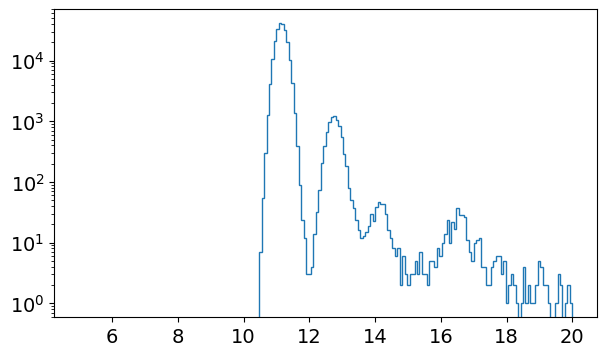

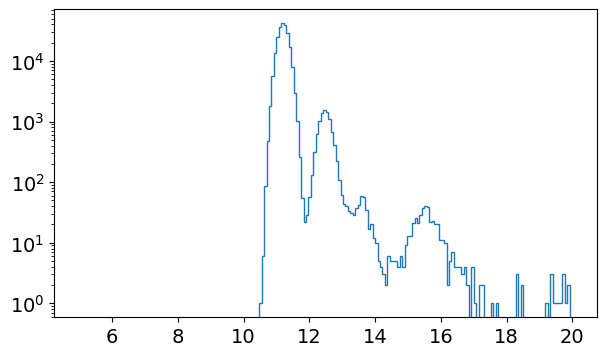

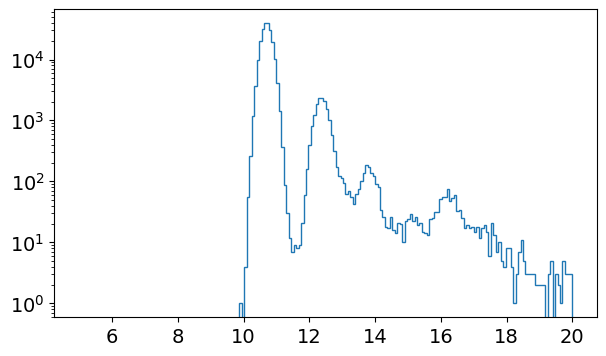

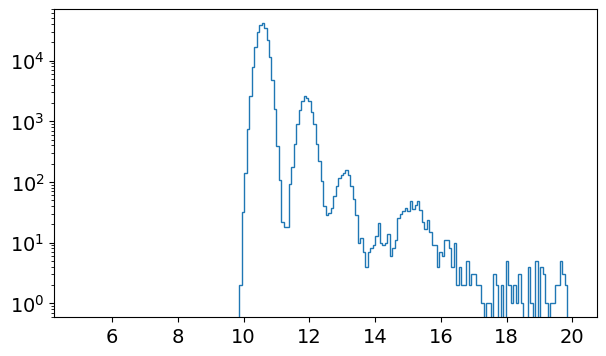

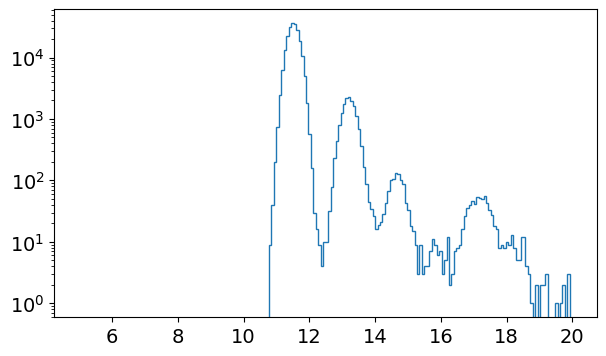

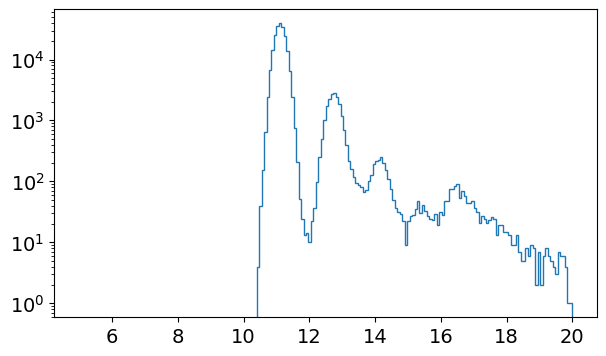

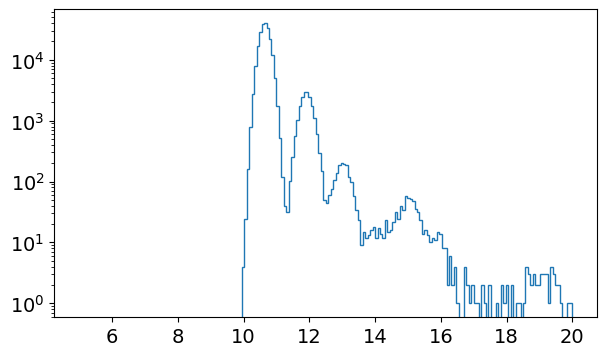

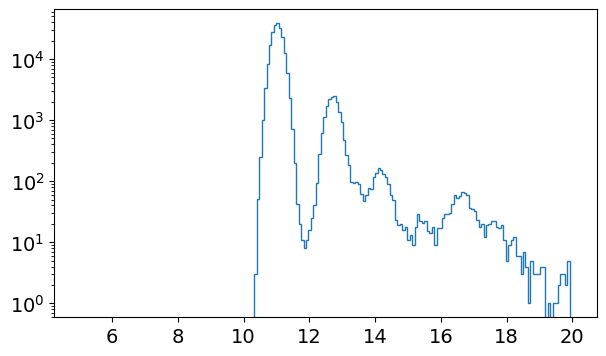

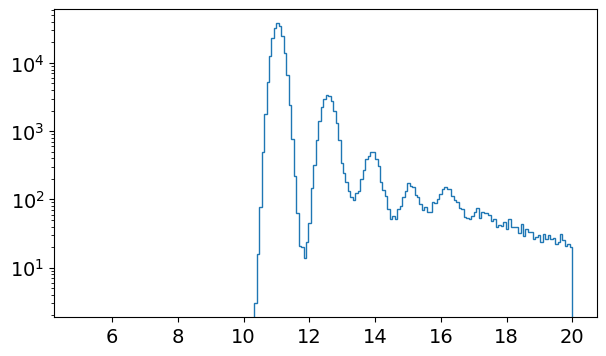

In [71]:
for ch in range(9):
    fig = plt.figure(figsize=(7, 4))
    plt.hist(np.std(ten_wfs_all_chs[ch], axis=1), bins=200, range=(5, 20), log=True, histtype='step', label=f'Ch {ch}')
    plt.show()

In [72]:
from scipy.signal import find_peaks, argrelextrema

# Find the peaks first
peaks, _ = find_peaks(np.std(ten_wfs_all_chs[0], axis=1), height=0)

# Now, locate the valley between the first two peaks
if len(peaks) >= 2:
    peak1, peak2 = peaks[0], peaks[1]
    # Find the local minima between the two peaks
    valley_range = spe_spectrum[peak1:peak2]
    valley_idx = np.argmin(valley_range)
    valley_pos = bin_edges[peak1 + valley_idx]  # position in the bin edges

    print(f"The valley is at: {valley_pos}")

# Plot the result
plt.plot(bin_edges[:-1], spe_spectrum)
plt.plot(bin_edges[peaks], spe_spectrum[peaks], "x")  # Mark peaks
plt.plot([valley_pos], [spe_spectrum[peak1 + valley_idx]], "o")  # Mark valley
plt.show()

NameError: name 'spe_spectrum' is not defined

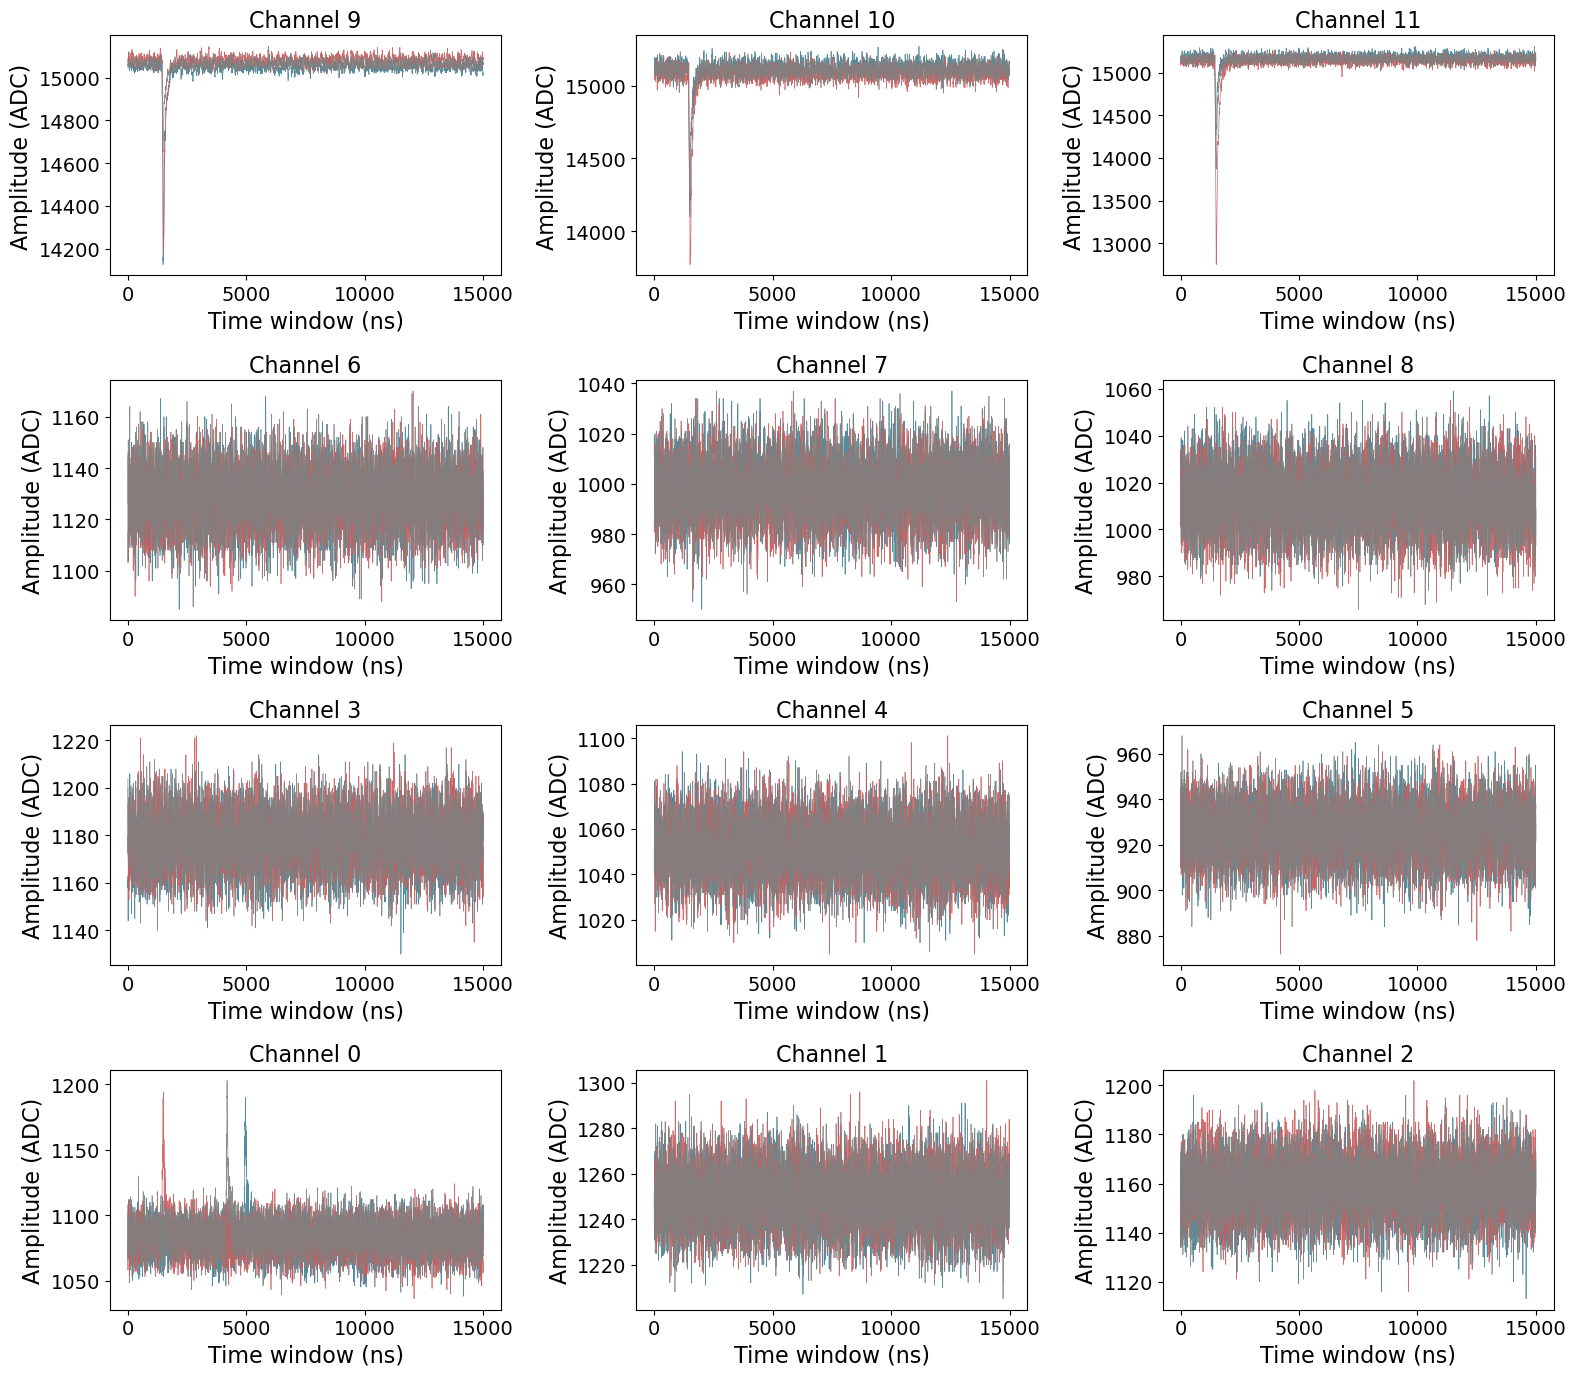

In [21]:
fig, axs = plt.subplots(4, 3, figsize=(16, 14))
for row, ich in enumerate(reversed(np.arange(0, 12, 3))):
    for col in range(3):
        ch = ich + col
        for evt, c in zip([107, 16049, 21012, 21066], [fav_col, 'indianred', 'grey']): #range(100):
            wf = np.array(RawTree[f'chan{ch}/rdigi'].array())[evt]
            axs[row][col].plot(2*np.arange(len(wf)), wf, linewidth=0.5, alpha=0.9, c=c)
        axs[row][col].set_xlabel('Time window (ns)', fontsize=16)
        axs[row][col].set_ylabel('Amplitude (ADC)',  fontsize=16)
        axs[row][col].set_title(f"Channel {ch}",     fontsize=16)
plt.tight_layout()
plt.show()

### Sum all the waveforms in the file

In [ ]:
fig, axs   = plt.subplots(4, 3, figsize=(16, 14))
for row, ich in enumerate(reversed(np.arange(0, 12, 3))):
    for col in range(3):
        ch = ich + col
        all_wfs = np.array(RawTree[f'chan{ch}/rdigi'].array())
        sum_wfs = np.sum(all_wfs, axis=0)
        axs[row][col].plot(2*np.arange(len(wf)), sum_wfs, linewidth=0.5, color=fav_col, alpha=0.9)
        axs[row][col].set_xlabel('Time window (ns)', fontsize=14)
        axs[row][col].set_ylabel('Amplitude (ADC)',  fontsize=14)
        axs[row][col].set_title(f"Channel {ch}",     fontsize=16)
        axs[row][col].tick_params(axis='x', labelsize=10)
        axs[row][col].tick_params(axis='y', labelsize=10)
        
fname = filename.split("/")[-1]
fig.suptitle(fname)
plt.tight_layout()
plt.show()

### Check the baseline in the first 500 ns

### Test

In [7]:
filename = '/Users/romoluque_c/LEGEND/BACON/new_setup/datatest/run-09_09_2024-file.root'
infile   = uproot.open(filename)
RawTree  = infile['RawTree']

In [8]:
sipm_chs     = range(12)
pmt_ch       = 12
max_smpl_bsl = 650
full_time_w  = 7500

In [13]:
%%time

bsl_mean_i_dict2 = {}
bsl_mode_i_dict2 = {}
bsl_mean_f_dict2 = {}
bsl_mode_f_dict2 = {}

for ch in range(13):
    print(ch)
    all_wfs = pf.wfs_from_rawtree(RawTree, ch)
    bsl_mean_i_dict2[ch] = pf.compute_baseline(all_wfs[:, :max_smpl_bsl],  mode=False)
    bsl_mode_i_dict2[ch] = pf.compute_baseline(all_wfs[:, :max_smpl_bsl],  mode=True)
    bsl_mean_f_dict2[ch] = pf.compute_baseline(all_wfs[:, -max_smpl_bsl:], mode=False)
    bsl_mode_f_dict2[ch] = pf.compute_baseline(all_wfs[:, -max_smpl_bsl:], mode=True)

0
1
2
3
4
5
6
7
8
9
10
11
12
CPU times: user 23.9 s, sys: 1.61 s, total: 25.5 s
Wall time: 25.5 s


In [18]:
%%time

std_all_dict = {}
max_all_dict = {}

for ch in range(13):
    print(ch)
    all_wfs = pf.wfs_from_rawtree(RawTree, ch)
    std_all_dict[ch] = np.std(all_wfs, axis=1)

0
1
2
3
4
5
6
7
8
9
10
11
12
CPU times: user 17.9 s, sys: 2.85 s, total: 20.7 s
Wall time: 20.7 s


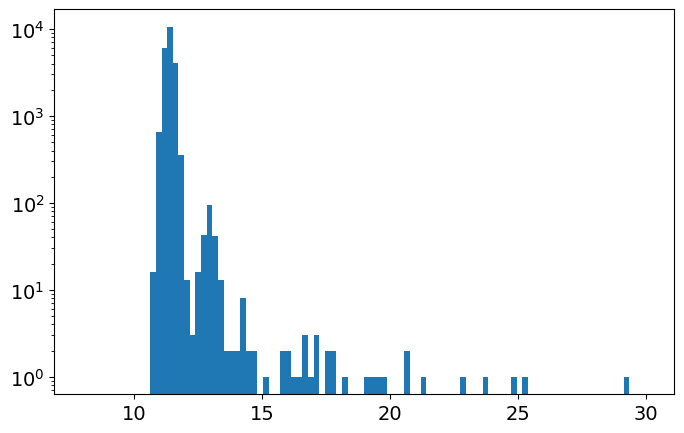

In [24]:
plt.hist(std_all_dict[0], bins=100, range=(8, 30), log=True);

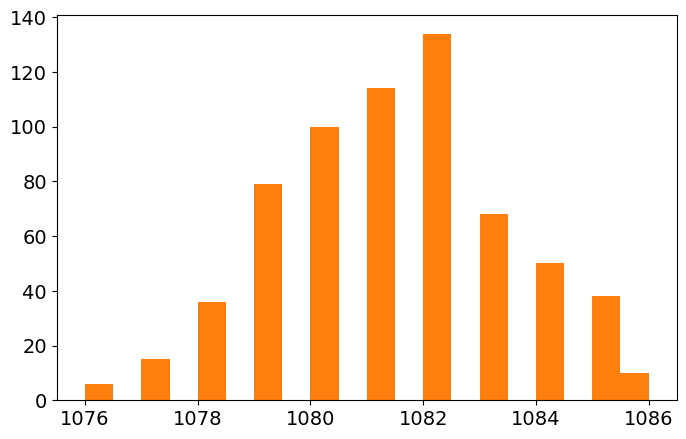

In [17]:
plt.hist(bsl_mean_i_dict2[0], bins=100)
plt.hist(bsl_mode_i_dict2[0], bins=20);